# Non-linear Regression: The starting point

Nonlinear models must exist and be used because real-world data often exhibit complex relationships that cannot be accurately represented by linear models alone. Several reasons explain why nonlinear models are necessary:
 1. Complex Relationships
   - Curved Trends
   - Saturation
 2. Periodic Behavior
   - Seasonal Patterns
 3. Threshold Effects
   - Behavioral Changes
 4. Interaction Effects
   - Complex Interactions
![Nonlinear Example](../Regression/RegressionImages/NonlinearExample.JPG)
Fitting a linear trend to the Boston marathon winning times is inadequate

Another process for using Non-linear regression illustrated below.
![NonLinearRegressionVolcanoErupts_time](../Regression/RegressionImages/Volcano_Erupt_Time.png)
In this example, imagine you are observing a volcanic eruption. The waiting time for the next eruption is the amount of time you have to wait until the volcano erupts again after the current eruption. This waiting time is measured in minutes.

**Definition**
A statistician has various tools for analyzing data sets, with regression being one of the most widely used methods. Regression helps determine the relationship between a response variable and one or more explanatory variables. Firstly, two types of regression are discussed: parametric and non-parametric. Each type has properties that are discussed here. In this analysis, a parametric model is selected from a range of possible curves, and its parameters are estimated. Alternatively, a non-parametric method may be employed, which involves selecting a broader function space to create a smooth curve.  In non-parametric methods, the data are directly represented, while in parametric methods, the direct effects of the data are not seen.
A good way to conceptualize parametric and non-parametric regression. Here’s a refined version:

**Parametric Models**: These involve a model with a fixed number of parameters and a specific, often simpler, functional form (i.e., a small basis function). The model is defined by a finite set of parameters that are estimated from the data.Key features include:

1. **Fixed Number of Parameters:** Parametric models have a fixed number of parameters that need to be estimated. These models are simpler and involve fewer computations.
2. **Specified Form:** They usually have a specified form (e.g., linear, polynomial, exponential) described by parameters.
3. **Efficiency with Small Data:** Due to the smaller number of parameters, these models often perform well with smaller datasets.
4. **Examples of Parametric Models:** Linear regression, polynomial regression, logistic regression, exponential models, and the Gompertz and Weibull models.


**Non-Parametric Models**: These use a more flexible approach with a broader function space, allowing for a larger and more complex basis function. The model can adapt to the data more flexibly without a predefined form, enabling it to fit more complex patterns.Key features include:

1. **No Specific Form:** These models do not assume a specific form and can flexibly fit to the data.
2. **Variable Number of Parameters:** The number of parameters in non-parametric models depends on the data and can increase with more data.
3. **High Flexibility:** They can model complex and nonlinear relationships effectively.
4. **Need for More Data:** These models typically require more data to perform well.
5. **Examples of Non-Parametric Models:** Kernel regression.

## Some parametric model

### The Beverton-Holt model
Similar to the _Michaelis-Menten model_, is used for modeling discrete-time population dynamics. The Beverton-Holt model gives the expected population $ n_{t+1} $ as a function of the previous population $ n_t $ with the following equation:

$$
n_{t+1} = f(x, (\alpha, \beta)) = \frac{\alpha x}{1 + x/\beta}
$$

Here, $ \theta = (\alpha, \beta) $ are the parameters. The parameter $ \alpha $ represents the slope at 0, and $ \beta $ is the concentration between 0 and the upper limit $ \alpha\beta $. This model represents a nonlinear regression because the two variables are related in a nonlinear, curved relationship.


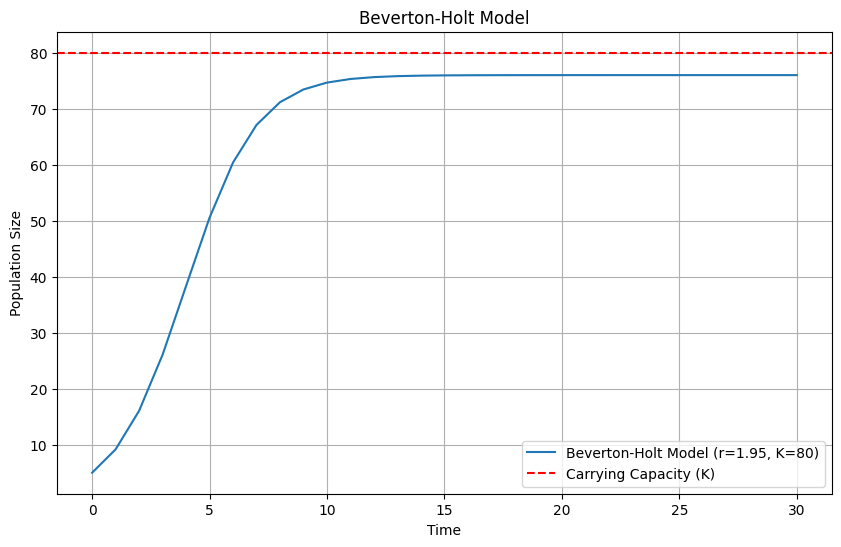

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
r = 1.95      # intrinsic growth rate
K = 80       # carrying capacity
N0 = 5       # initial population size
T = 30        # number of time steps

# Initialize arrays
N = np.zeros(T+1)
N[0] = N0

# Beverton-Holt model simulation
for t in range(T):
    N[t+1] = r * N[t] / (1 + N[t] / K)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(N, label=f'Beverton-Holt Model (r={r}, K={K})')
plt.axhline(K, color='red', linestyle='--', label='Carrying Capacity (K)')
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.title('Beverton-Holt Model')
plt.legend()
plt.grid(True)
plt.show()


### Weibull Growth Model
The Weibull growth model you provided is a general form of the Weibull function used for modeling growth processes, particularly in fields like reliability engineering and survival analysis.
$\theta_1 + (\theta_2 - \theta_1) \times \exp(-\theta_3 \times X^{\theta_4})$
Where:
- $ \theta_1 $ is the lower asymptote or baseline value.
- $ \theta_2 $ is the upper asymptote or the maximum value the function can approach.
- $ \theta_3 $ and $ \theta_4 $ are shape parameters that control the growth rate and curvature of the function.
- $ X $ is the independent variable (often time or a similar growth measure).

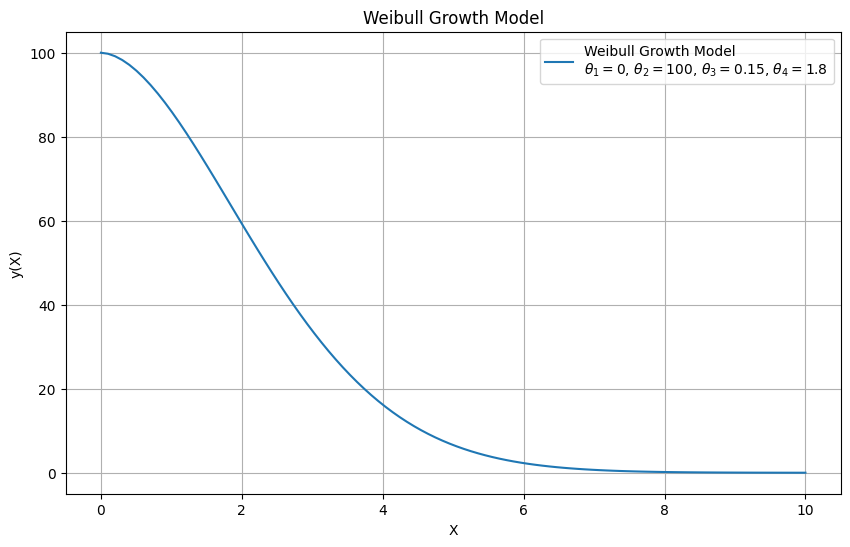

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
theta1 = 0      # Lower asymptote
theta2 = 100    # Upper asymptote
theta3 = 0.15    # Growth rate parameter
theta4 = 1.8     # Shape parameter

# Generate data
X = np.linspace(0, 10, 100)
y = theta1 + (theta2 - theta1) * np.exp(-theta3 * X**theta4)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(X, y, label=f'Weibull Growth Model\n$\\theta_1={theta1}$, $\\theta_2={theta2}$, $\\theta_3={theta3}$, $\\theta_4={theta4}$')
plt.xlabel('X')
plt.ylabel('y(X)')
plt.title('Weibull Growth Model')
plt.legend()
plt.grid(True)
plt.show()

### Fourier Series in Parametric Regression

In a parametric regression context, the Fourier series can be used to fit periodic data by modeling the function as a sum of sine and cosine terms. This is especially useful for capturing periodic patterns in the data.

#### Fourier Series Equation

The general form of the Fourier series for a function $ f(x) $ over a period $ P $ is:

$$ f(x) = a_0 + \sum_{n=1}^{N} \left( a_n \cos\left( \frac{2 \pi n x}{P} \right) + b_n \sin\left( \frac{2 \pi n x}{P} \right) \right) $$

Where:
- $ a_0 $ is the mean of the function over one period.
- $ a_n $ and $ b_n $ are the Fourier coefficients.
- $ N $ is the number of terms in the series.
- $ P $ is the period of the function.

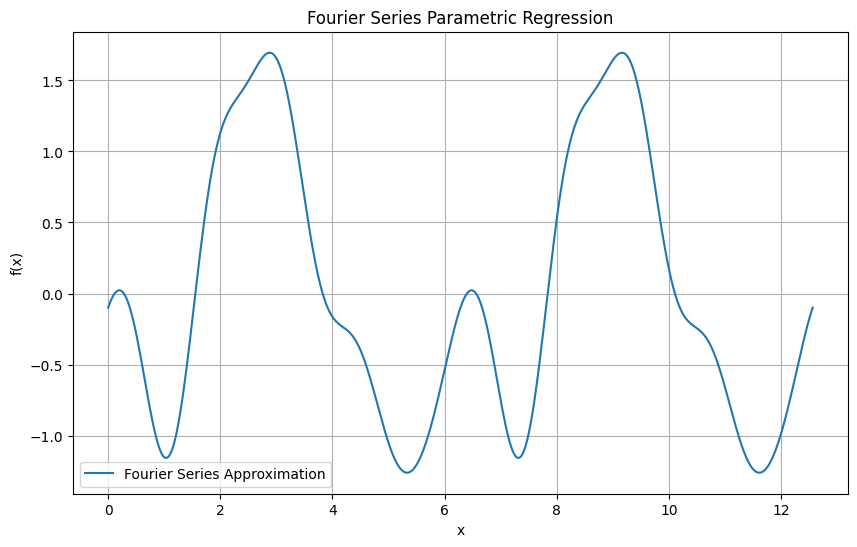

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
P = 2 * np.pi  # Period of the function
N = 5          # Number of terms in the series

# Fourier coefficients (example values)
a0 = 0
an = [0, -1, 0.5, 0.3, 0.2, -0.1]
bn = [0, 0.5, -0.3, 0.2, 0.1, 0.05]

# Generate data
x = np.linspace(0, 2*P, 1000)
f_x = a0 + sum(an[n] * np.cos(2 * np.pi * n * x / P) + bn[n] * np.sin(2 * np.pi * n * x / P) for n in range(1, N+1))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, f_x, label='Fourier Series Approximation')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Fourier Series Parametric Regression')
plt.legend()
plt.grid(True)
plt.show()

### Basis Function Regression

In Basis Function Regression, we represent the function $ f(x) $ as a linear combination of basis functions. For a one-dimensional input $ x $, this can be expressed as:

$$ y = f(x) = \sum_{k} w_k b_k(x) $$

Where:
- $ y $ is the output.
- $ f(x) $ is the target function we want to learn.
- $ w_k $ are the weights (parameters) to be estimated.
- $ b_k(x) $ are the basis functions.

#### Common Basis Functions

Some common choices for basis functions $ b_k(x) $ include:
- **Polynomial Basis Functions:** $ b_k(x) = x^k $
- **Gaussian Basis Functions:** $ b_k(x) = \exp\left(-\frac{(x - \mu_k)^2}{2\sigma^2}\right) $
- **Fourier Basis Functions:** $ b_k(x) = \cos(kx) $ or $ b_k(x) = \sin(kx) $

### Exponential model
the function you're referring to is commonly used to model processes where the rate of change is proportional to the current value, leading to exponential growth or decay. 

For the exponential model:

$$ f(x, \theta) = \theta_1 \exp(\theta_2 x) $$

where:
- $\theta_1$ is a scaling parameter (often representing the initial value),
- $\theta_2$ is the rate parameter (which determines the growth or decay rate),

**Exponential Growth or Decay**:
   - If $\theta_2 > 0$, the function $ f(x, \theta) $ represents exponential growth.
   - If $\theta_2 < 0$, the function $ f(x, \theta) $ represents exponential decay.


### The asymptotic regression model
 describes a situation where a variable $ y $ approaches a horizontal asymptote as the independent variable $ x $ increases. This model is useful for describing growth processes that slow down and stabilize at a maximum value.

The model you provided is:

$$
y = \theta_1 - (\theta_1 - \theta_2) \exp(-\theta_3 x) + \epsilon,
$$

where:
- $\theta_1$ is the maximum attainable value of $ y $ (the horizontal asymptote),
- $\theta_2$ is the value of $ y $ when $ x = 0 $ (the initial value),
- $\theta_3$ is related to the rate of growth of $ y $,
- $\epsilon$ is the error term.

#### Key Characteristics:

1. **Asymptotic Behavior**:
   - As $ x \to \infty $, $\exp(-\theta_3 x) \to 0$, and hence $ y \to \theta_1 $. Thus, $\theta_1$ represents the asymptote that $ y $ approaches.

2. **Initial Value**:
   - When $ x = 0 $:
     $$
     y = \theta_1 - (\theta_1 - \theta_2) \exp(0) + \epsilon = \theta_1 - (\theta_1 - \theta_2) + \epsilon = \theta_2 + \epsilon
     $$
   - Therefore, the initial value $ y(0) $ is approximately $\theta_2$, and the error term $\epsilon$ accounts for any deviations from $\theta_2$ at $ x = 0 $.

3. **Rate of Increase**:
   - $\theta_3$ controls how quickly $ y $ approaches the asymptote. A larger $\theta_3$ means $ y $ reaches $\theta_1$ faster, while a smaller $\theta_3$ implies a slower approach to the asymptote.



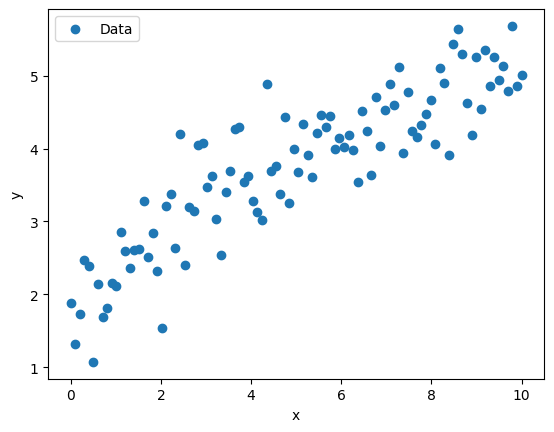

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Generate synthetic data
np.random.seed(0)
x_data = np.linspace(0, 10, 100)
theta_1, theta_2, theta_3 = 5.0, 1.0, 0.3  # True parameters
y_data = theta_1 - (theta_1 - theta_2) * np.exp(-theta_3 * x_data) + 0.5 * np.random.normal(size=len(x_data))

# Plot the synthetic data
plt.scatter(x_data, y_data, label='Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


**Example:** Fitting the Model


Fitted parameters:
 theta_1 = 5.944698258632231
 theta_2 = 1.704264102626926
 theta_3 = 0.1512122407271999


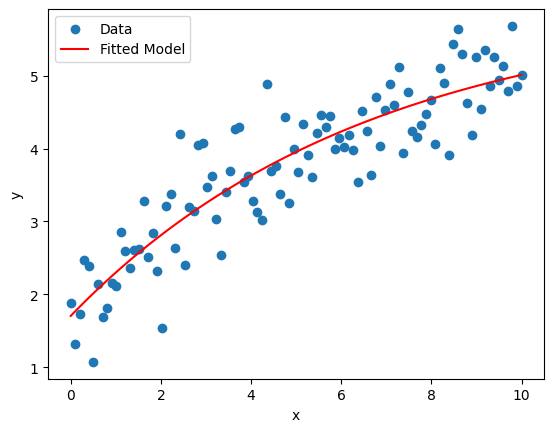

In [2]:
# Define the asymptotic regression model function
def asymptotic_model(x, theta_1, theta_2, theta_3):
    return theta_1 - (theta_1 - theta_2) * np.exp(-theta_3 * x)

# Fit the model to the data
initial_guess = [4.0, 2.0, 0.5]  # Initial guess for theta_1, theta_2, theta_3
params, covariance = curve_fit(asymptotic_model, x_data, y_data, p0=initial_guess)

# Extract fitted parameters
fitted_theta_1, fitted_theta_2, fitted_theta_3 = params

print(f"Fitted parameters:\n theta_1 = {fitted_theta_1}\n theta_2 = {fitted_theta_2}\n theta_3 = {fitted_theta_3}")

# Plot the fitted model
y_fitted = asymptotic_model(x_data, fitted_theta_1, fitted_theta_2, fitted_theta_3)
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, y_fitted, color='red', label='Fitted Model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


### The power curve model
also known as the Freundlich equation or allometric equation, is used to describe relationships where the dependent variable $ y $ is a power function of the independent variable $ x $. It is particularly useful for modeling scaling laws and phenomena that do not have a bounded upper limit.

The power curve model is given by:

$$ y = \theta_1 x^{\theta_2} + \epsilon $$

where:
- $\theta_1$ is a scaling parameter,
- $\theta_2$ is the exponent that determines the nature of the relationship between $ y $ and $ x $,
- $\epsilon$ is the error term.

#### Key Characteristics:

1. **No Asymptote**:
   - Unlike the exponential or asymptotic models, the power curve does not approach a horizontal asymptote. As $ x $ increases, $ y $ increases (or decreases, depending on $\theta_2$) without bound.

2. **Equivalent to Exponential Model in Logarithmic Form**:
   - You can express the power function in an exponential form by taking the natural logarithm. This equivalence is useful in certain transformations and analyses:
     $$
     y = \theta_1 x^{\theta_2}
     $$
     $$
     \log(y) = \log(\theta_1) + \theta_2 \log(x)
     $$
   - This shows that the power curve model can be viewed as a linear model in the log-log space.

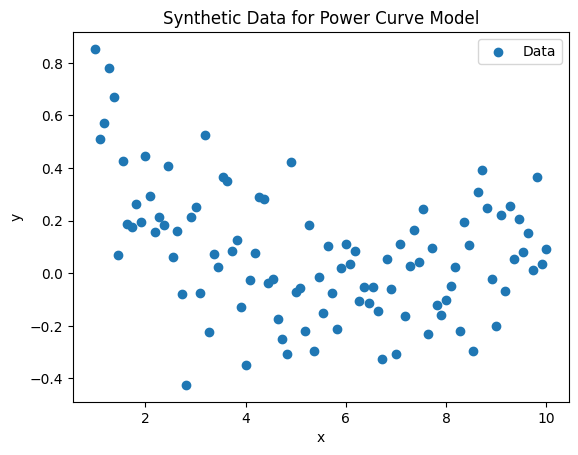

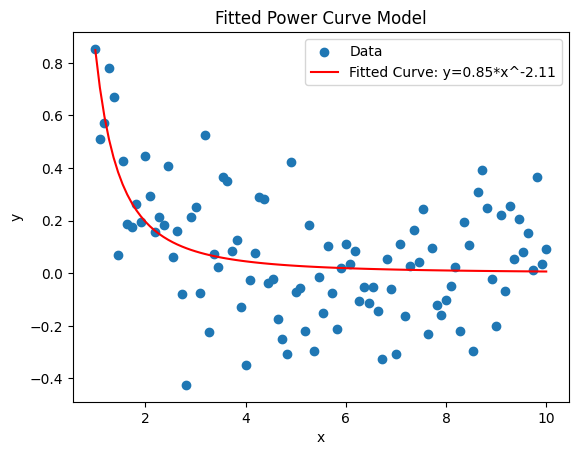

(np.float64(0.8481423387462285), np.float64(-2.1138951137476774))

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Generating synthetic data
np.random.seed(0)
x = np.linspace(1, 10, 100)
theta_1 = 0.5
theta_2 = -1.7
epsilon = 0.2*np.random.normal(0, 1, size=x.size)
y = theta_1 * x**theta_2 + epsilon

# Plotting the synthetic data
plt.scatter(x, y, label='Data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Synthetic Data for Power Curve Model')
plt.legend()
plt.show()

# Define the power curve function
def power_curve(x, theta_1, theta_2):
    return theta_1 * x**theta_2

# Fit the power curve model to the data
popt, pcov = curve_fit(power_curve, x, y)
theta_1_est, theta_2_est = popt

# Plotting the fitted curve
y_fit = power_curve(x, *popt)
plt.scatter(x, y, label='Data')
plt.plot(x, y_fit, color='red', label=f'Fitted Curve: y={theta_1_est:.2f}*x^{theta_2_est:.2f}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fitted Power Curve Model')
plt.legend()
plt.show()

theta_1_est, theta_2_est


### The logarithmic model 
is used to describe relationships where the dependent variable $ y $ changes as a function of the logarithm of the independent variable $ x $. This model is useful for situations where the effect of $ x $ on $ y $ becomes smaller as $ x $ increases, or vice versa.

The logarithmic model is given by:

$$
y = \theta_1 + \theta_2 \log(x)
$$

where:
- $\theta_1$ is the intercept,
- $\theta_2$ is the coefficient that determines the slope of the relationship,
- $\log(x)$ denotes the natural logarithm of $ x $, and $ x > 0 $ (since the logarithm is only defined for positive $ x $).

#### Notes:

1. **Shape of the Curve**:
   - If $\theta_2 > 0$, the function is convex upwards. As $ x $ increases, $ y $ increases, but the rate of increase slows down.
   - If $\theta_2 < 0$, the function is concave downwards. As $ x $ increases, $ y $ decreases, and the rate of decrease slows down.

2. **Linear Relationship**:
   - The logarithmic model transforms into a linear model when $ \log(x) $ is used as the predictor. In this transformed space, the relationship between $ y $ and $ \log(x) $ is linear.


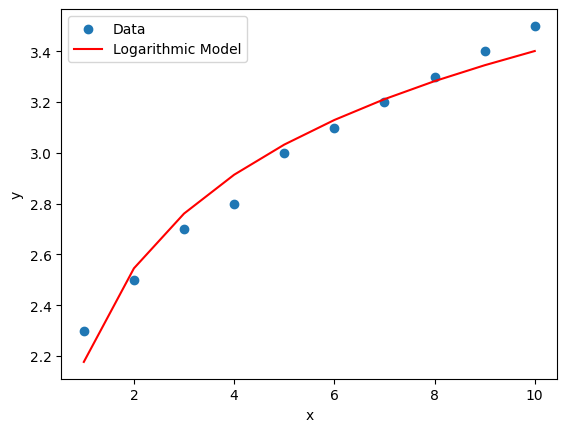

Intercept (θ1): 2.1769644615568438
Coefficient (θ2): 0.5316562524746


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([2.3, 2.5, 2.7, 2.8, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5])

# Transform x using the natural logarithm
log_x = np.log(x)

# Reshape data for sklearn
log_x_reshaped = log_x.reshape(-1, 1)
y_reshaped = y.reshape(-1, 1)

# Create and fit the model
model = LinearRegression()
model.fit(log_x_reshaped, y_reshaped)

# Extract parameters
theta_1 = model.intercept_[0]
theta_2 = model.coef_[0][0]

# Make predictions
y_pred = model.predict(log_x_reshaped)

# Plot the data and the model
plt.scatter(x, y, label='Data')
plt.plot(x, y_pred, color='red', label='Logarithmic Model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Print the parameters
print(f"Intercept (θ1): {theta_1}")
print(f"Coefficient (θ2): {theta_2}")


### Logistic model
 is a specific type of sigmoidal curve that is widely used to model growth processes and other phenomena where the rate of change is initially rapid but slows down as it approaches an asymptote. The logistic curve is symmetric around its inflection point and is derived from the cumulative logistic distribution function.

The parameterized logistic model is given by:

$$
y = \theta_1 + \frac{\theta_2 - \theta_1}{1 + \exp(\theta_3(x - \theta_4))} + \epsilon
$$

where:
- $\theta_1$ is the lower asymptote (the value $ y $ approaches as $ x \to -\infty $),
- $\theta_2$ is the upper asymptote (the value $ y $ approaches as $ x \to \infty $),
- $\theta_3$ controls the steepness of the curve around the inflection point. It determines how quickly $ y $ transitions from $\theta_1$ to $\theta_2$,
- $\theta_4$ is the x-value at which the response is halfway between $\theta_1$ and $\theta_2$, representing the inflection point of the curve,
- $\epsilon$ is the error term.

#### Notes:

1. **Asymptotes**:
   - As $ x \to -\infty $, $ y \to \theta_1 $.
   - As $ x \to \infty $, $ y \to \theta_2 $.

2. **Inflection Point**:
   - The inflection point occurs at $ x = \theta_4 $. At this point, the growth rate of $ y $ is maximum and transitions from increasing to leveling off (or vice versa, depending on $\theta_3$).

3. **Slope**:
   - The parameter $\theta_3$ affects the steepness of the curve around the inflection point:
     - If $\theta_3 > 0$, the curve increases from $\theta_1$ to $\theta_2$.
     - If $\theta_3 < 0$, the curve decreases from $\theta_2$ to $\theta_1$.

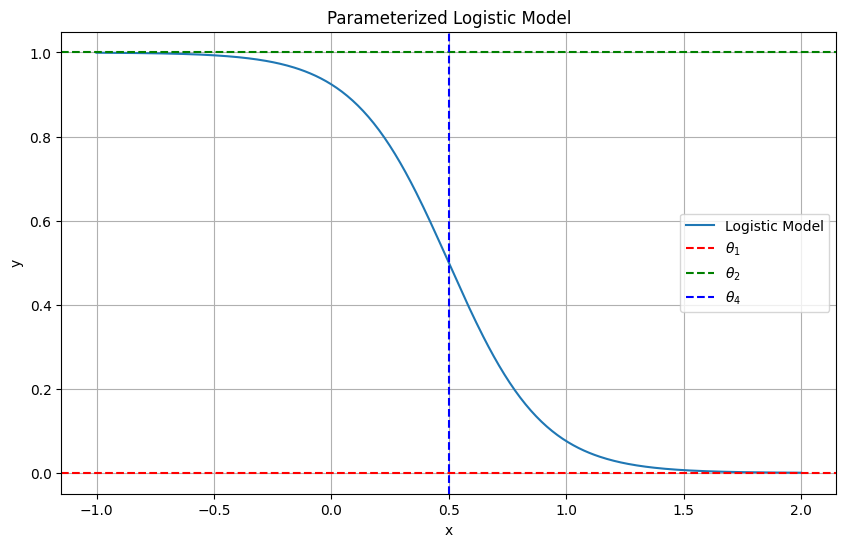

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
theta_1 = 0
theta_2 = 1
theta_3 = 5
theta_4 = 0.5

# Logistic function
def logistic_model(x, theta_1, theta_2, theta_3, theta_4):
    return theta_1 + (theta_2 - theta_1) / (1 + np.exp(theta_3 * (x - theta_4)))

# Generate data
x_values = np.linspace(-1, 2, 400)
y_values = logistic_model(x_values, theta_1, theta_2, theta_3, theta_4)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='Logistic Model')
plt.axhline(y=theta_1, color='r', linestyle='--', label=r'$\theta_1$')
plt.axhline(y=theta_2, color='g', linestyle='--', label=r'$\theta_2$')
plt.axvline(x=theta_4, color='b', linestyle='--', label=r'$\theta_4$')
plt.title('Parameterized Logistic Model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


### The Gompertz model
 The Gompertz curve or Gompertz function is a type of mathematical model for a time series, named after Benjamin Gompertz (1779–1865). It is another type of sigmoidal curve that is often used to describe growth processes and other phenomena where the growth rate decreases over time. Unlike the logistic model, the Gompertz curve is not symmetric around its inflection point, which can be useful for modeling asymmetric growth patterns.

The parameterized Gompertz model is given by:

$$
y = \theta_1 + (\theta_2 - \theta_1) \exp \left\{ - \exp \left[ \theta_3 (x - \theta_4) \right] \right\} + \epsilon
$$

where:
- $\theta_1$ is the lower asymptote (the value $ y $ approaches as $ x \to -\infty $),
- $\theta_2$ is the upper asymptote (the value $ y $ approaches as $ x \to \infty $),
- $\theta_3$ controls the growth rate around the inflection point. It determines how quickly the curve transitions from $\theta_1$ to $\theta_2$,
- $\theta_4$ is the x-value at which the growth rate is the highest, representing the inflection point of the curve,
- $\epsilon$ is the error term.

#### Key Features:

1. **Asymptotes**:
   - As $ x \to -\infty $, $ y \to \theta_1 $.
   - As $ x \to \infty $, $ y \to \theta_2 $.

2. **Inflection Point**:
   - The inflection point occurs at $ x = \theta_4 $. The curve does not have a symmetric shape around this point as in the logistic model. Instead, the curve typically exhibits an asymmetric S-shape, where growth may be rapid initially and then slows down more gradually.

3. **Growth Rate**:
   - The parameter $\theta_3$ affects the steepness of the curve and the position of the inflection point. The Gompertz model typically describes growth that starts quickly and then decelerates, but the shape is not symmetrical.


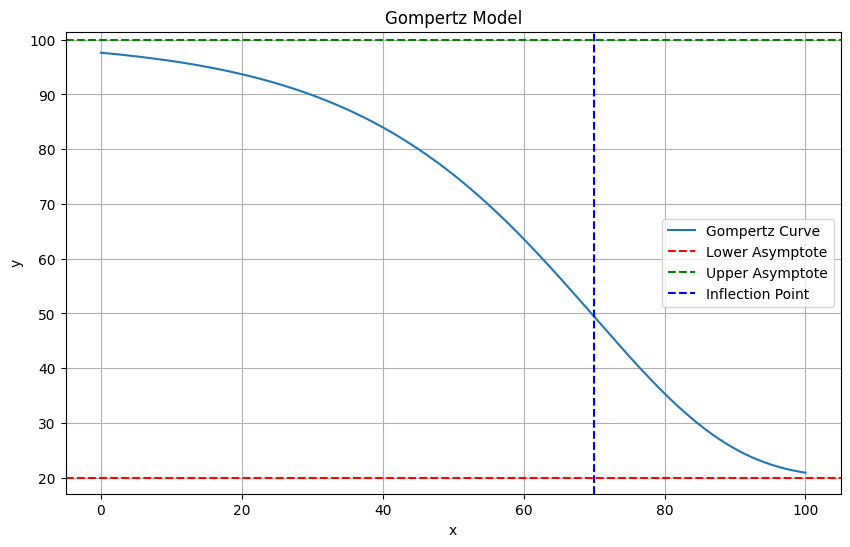

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Gompertz function definition
def gompertz(x, theta1, theta2, theta3, theta4):
    return theta1 + (theta2 - theta1) * np.exp(-np.exp(theta3 * (x - theta4)))

# Parameters
theta1 = 20   # Lower asymptote
theta2 = 100 # Upper asymptote
theta3 = 0.05 # Growth rate
theta4 = 70  # Inflection point

# Generate x values
x = np.linspace(0, 100, 400)

# Generate y values using the Gompertz function
y = gompertz(x, theta1, theta2, theta3, theta4)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Gompertz Curve')
plt.axhline(theta1, color='red', linestyle='--', label='Lower Asymptote')
plt.axhline(theta2, color='green', linestyle='--', label='Upper Asymptote')
plt.axvline(theta4, color='blue', linestyle='--', label='Inflection Point')
plt.title('Gompertz Model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


## Homework
We have concluded the introduction of models, and now it’s time for the students to get involved. Your task is to combine the concepts of the models to generate a new model that better describes phenomena in the world, as demonstrated in the example provided here.

### 🌟 Beverton-Holt Logistic-Exponential Model (BHL-EM)

#### Model Formulation:
The BHL-EM can be expressed as:

$$ y_{t+1} = \theta_1 + \frac{\theta_2 - \theta_1}{1 + \exp(-\theta_3 \cdot (y_t - \theta_4)) + \frac{y_t}{K}} $$

where:
- $ y_t $ is the population size (or other growth measure) at time $ t $.
- $\theta_1$ is the lower asymptote.
- $\theta_2$ is the upper asymptote.
- $\theta_3$ controls the steepness of the curve.
- $\theta_4$ is the inflection point.
- $ K $ is the carrying capacity.
- The term $ \exp(-\theta_3 \cdot (y_t - \theta_4)) $ captures the logistic growth characteristics.
- The term $ \frac{y_t}{K} $ introduces density dependence similar to the Beverton-Holt model.

### Key Features and Innovations:

1. **Density Dependence and Logistic Growth**:
   - The model captures both density dependence and logistic growth with an exponential function, providing a nuanced understanding of growth dynamics.

2. **Combining Strengths**:
   - The model combines the strengths of the Beverton-Holt and logistic models, offering a comprehensive tool for modeling complex growth processes.

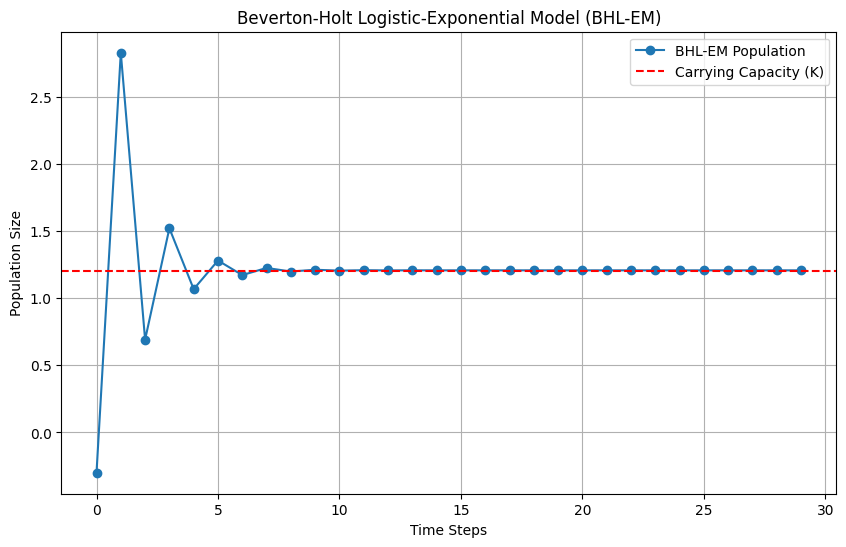

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
theta_1 = 0
theta_2 = 3.5
theta_3 = -0.4
theta_4 = 1.5
K = 1.2  # Carrying capacity

# Beverton-Holt Logistic with Exponential Dynamics function
def beverton_holt_logistic_exp(y, theta_1, theta_2, theta_3, theta_4, K):
    return theta_1 + ((theta_2 - theta_1) / (1 + np.exp(-theta_3 * (y - theta_4)) + y / K))

# Initial population size
y_0 = -0.3
time_steps = 30
y_values = [y_0]

# Generate data over time
for t in range(1, time_steps):
    y_next = beverton_holt_logistic_exp(y_values[-1], theta_1, theta_2, theta_3, theta_4, K)
    y_values.append(y_next)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(time_steps), y_values, marker='o', linestyle='-', label='BHL-EM Population')
plt.axhline(y=K, color='r', linestyle='--', label='Carrying Capacity (K)')
plt.title('Beverton-Holt Logistic-Exponential Model (BHL-EM)')
plt.xlabel('Time Steps')
plt.ylabel('Population Size')
plt.legend()
plt.grid(True)
plt.show()
